In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [148]:
df = pd.read_csv("mcdonalds.csv")

In [149]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [151]:
print(pd.isnull(df).sum()) # To check null values

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [152]:
sizes = [df.query('Gender == "Male"').Gender.count(),df.query('Gender == "Female"').Gender.count()]

(-1.1794633237404921,
 1.1662488617401656,
 -1.1177211057908336,
 1.1077885396727187)

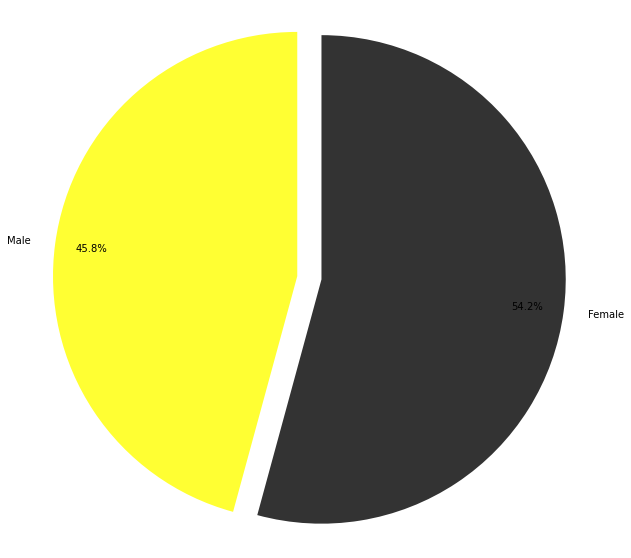

In [153]:
labels = ['Male','Female']
plt.figure(figsize=(10,10))
explode=(0.05,0.05)
colors = ['#FFFF33','#333333']
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes,colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,explode = explode)
p=plt.gcf()
plt.axis('equal')

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


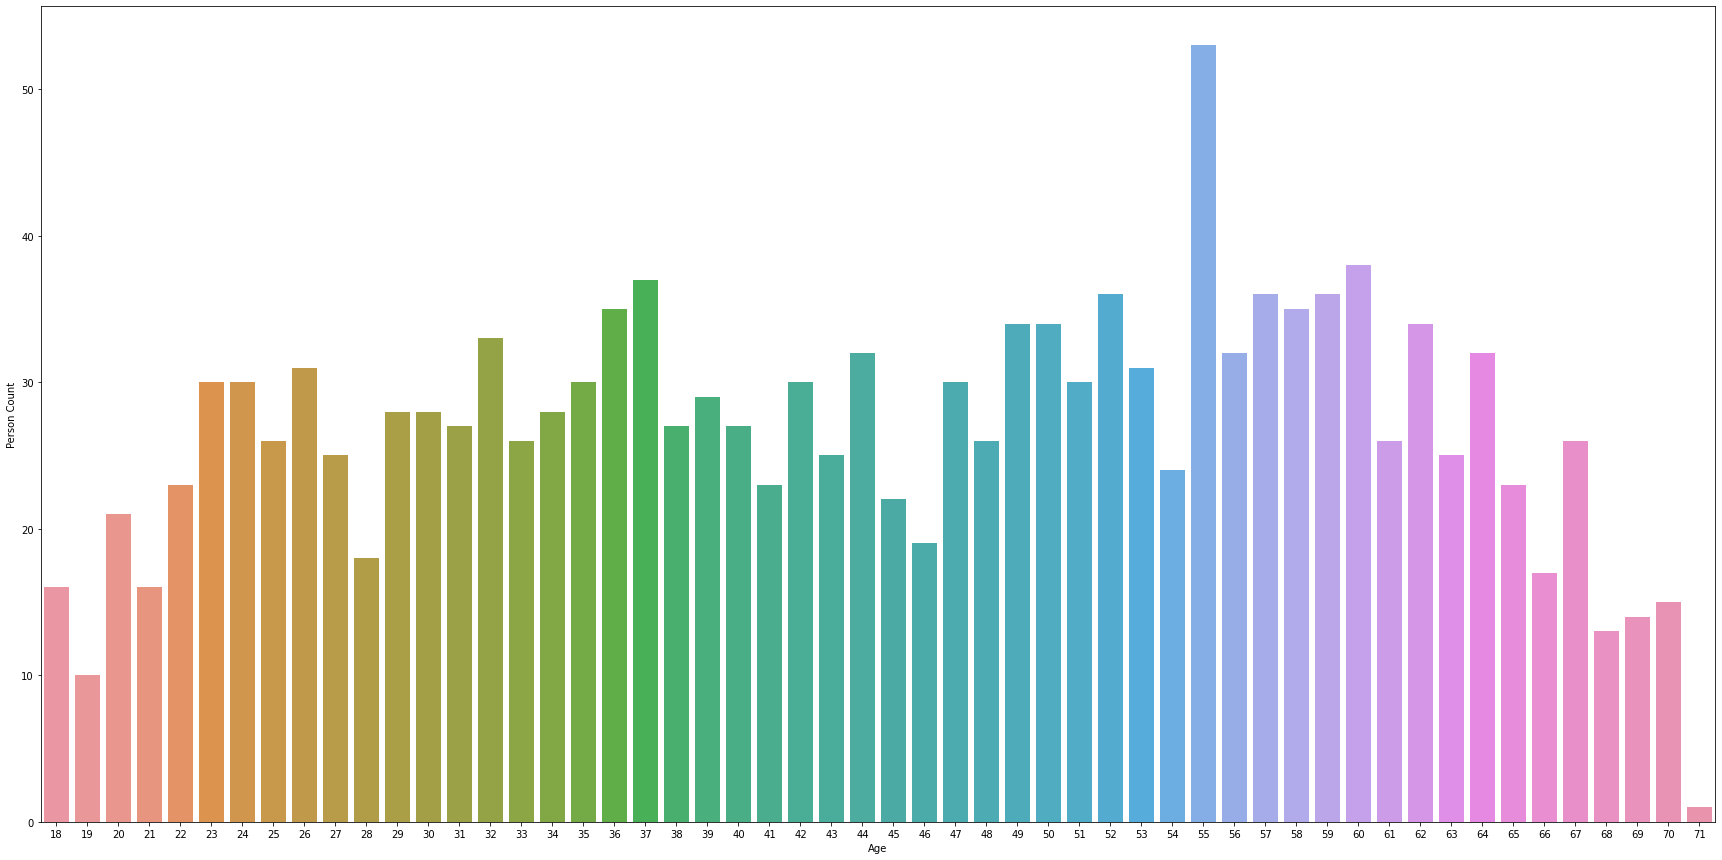

In [154]:
plt.figure(figsize=(30,15))
sns.countplot(df.Age)
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.show()

In [155]:
li=['convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']
for i in range(len(li)):
  df[li[i]]=np.where(df[li[i]]=='Yes',1,0)

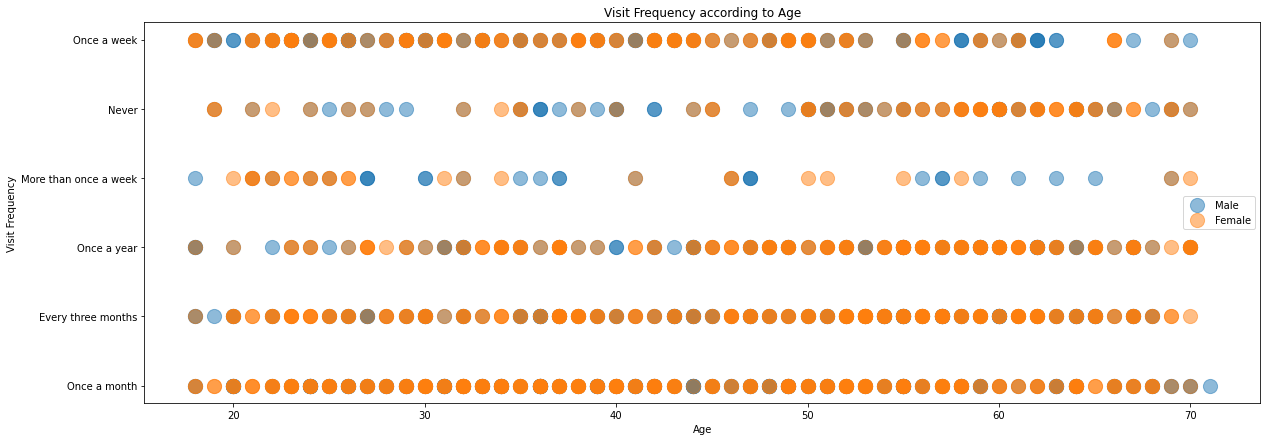

In [156]:
plt.figure(figsize=(20,7))
gender = ['Male', 'Female']
for i in gender:
    plt.scatter(x='Age',y='VisitFrequency', data=df[df['Gender']==i] , s = 200 , alpha = 0.5,label = i )
plt.legend()
plt.xlabel("Age")
plt.ylabel("Visit Frequency")
plt.title("Visit Frequency according to Age")
plt.show()

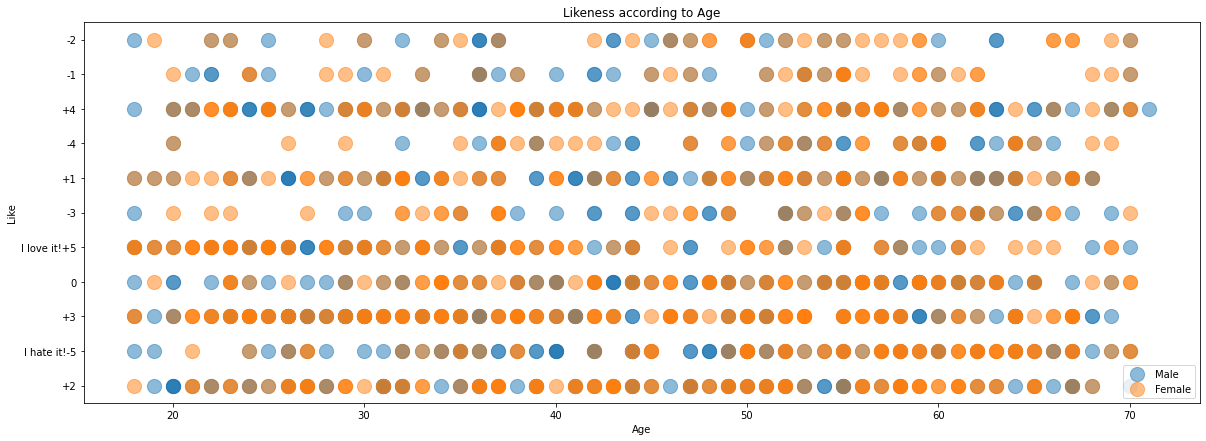

In [157]:
plt.figure(figsize=(20,7))
gender = ['Male', 'Female']
for i in gender:
    plt.scatter(x='Age',y='Like', data=df[df['Gender']==i] , s = 200 , alpha = 0.5,label = i )
plt.legend()
plt.xlabel("Age")
plt.ylabel("Like")
plt.title("Likeness according to Age")
plt.show()

In [158]:
#clustering model library
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [160]:
categorical = df.drop(['Gender','VisitFrequency','Like','Age'],axis=1)
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in categorical.columns:
    categorical[i] = label_encoder.fit_transform(categorical[i])

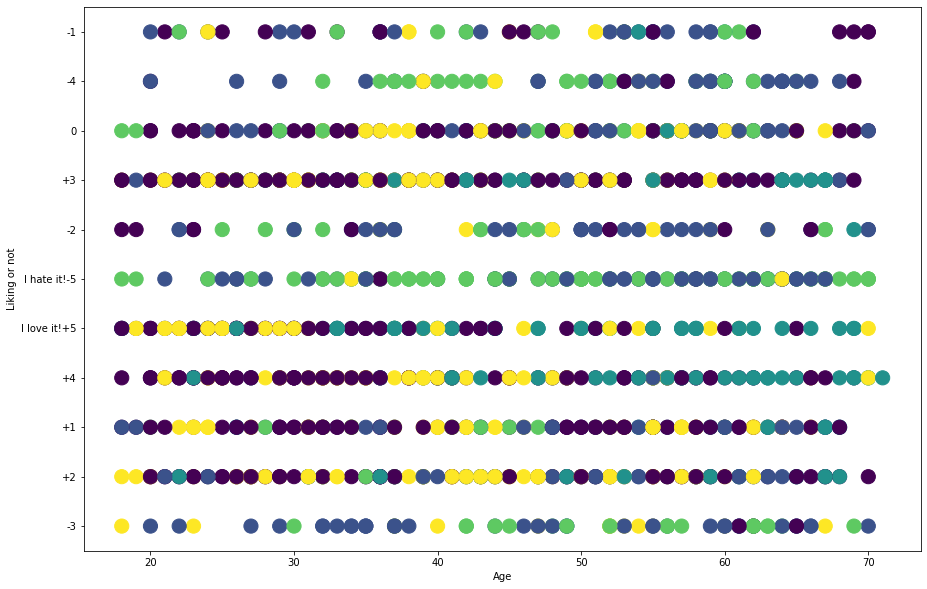

In [161]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
data_predict = kmeans.fit_predict(categorical)

plt.figure(figsize=(15,10))
plt.scatter( x = 'Age' ,y = 'Like' , data = df , c = data_predict , s = 200 )
plt.xlabel("Age")
plt.ylabel("Liking or not")
plt.show()

In [170]:
import scipy.cluster.hierarchy as shc

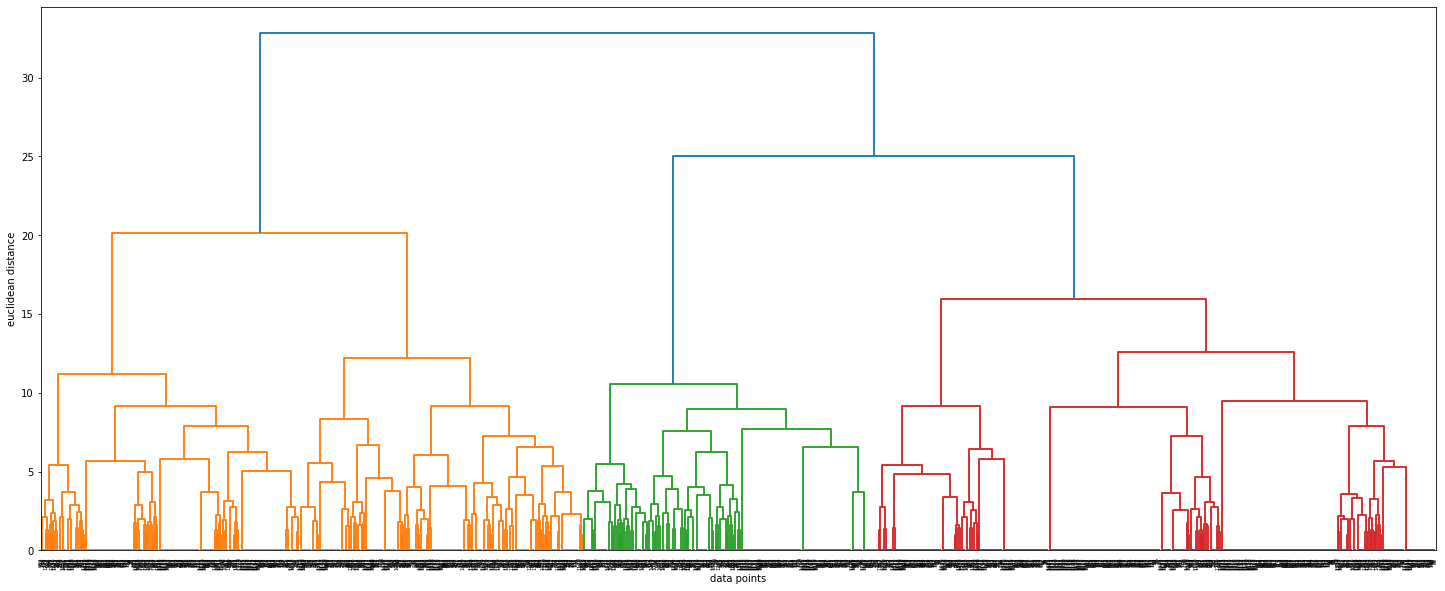

In [172]:
merg = linkage(categorical,method="ward")
plt.figure(figsize=(25,10))
dendrogram(merg,leaf_rotation = 90)
dendro = shc.dendrogram(shc.linkage(categorical, method="ward")) 
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()